# Predicting ADHD from Resting-State fMRI

In this project, we work on resting-state fMRI data to investigate brain connectivity patterns.
 

In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import datasets, maskers, plotting
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure


# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


   - This section imports the necessary Python libraries for various tasks:
     - `os`: This module provides a portable way of using operating system-dependent functionality.
     - `pandas as pd`: Pandas is a powerful data manipulation library. It's commonly imported as `pd` for brevity.
     - `numpy as np`: NumPy is a library for numerical computing in Python. It's often imported as `np` for brevity.
     - `matplotlib.pyplot as plt`: Matplotlib is a plotting library for Python. The `pyplot` module provides a MATLAB-like interface for plotting.
     - `seaborn as sns`: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
     - `nilearn.datasets`: Nilearn is a Python module for fast and easy statistical learning on neuroimaging data. It provides datasets and tools specifically tailored for neuroimaging analysis.
     - `nilearn.maskers`: This submodule contains tools for extracting data from neuroimaging data formats.
     - `nilearn.plotting`: This submodule provides functions to plot various neuroimaging data.
     - `NiftiLabelsMasker`: This class in Nilearn is used to extract time series from regions defined by labels in a Nifti image.
     - `ConnectivityMeasure`: This class in Nilearn is used to compute connectivity matrices from neuroimaging data.


In [2]:

data = datasets.fetch_adhd(n_subjects=None, data_dir=None, url=None, resume=True, verbose=1)

This line of code is using the `fetch_adhd` function from the `datasets` module in the `nilearn` library to download the ADHD dataset. Let's break down the parameters used in this function:

- `n_subjects`: This parameter specifies the number of subjects to fetch from the dataset. When set to `None`, it fetches all available subjects.
- `data_dir`: This parameter specifies the directory where the data will be stored. When set to `None`, it uses the default data directory.
- `url`: This parameter specifies the URL from which to download the dataset. When set to `None`, it uses the default URL.
- `resume`: This parameter determines whether to resume downloading if a partial download exists. When set to `True`, it resumes the download if it was interrupted.
- `verbose`: This parameter controls the verbosity of the output during the download process. When set to `1`, it displays progress information during the download.

Once executed, this line will download the ADHD dataset and store it in the specified directory (or the default directory if none is provided). It will fetch all available subjects in the dataset. Additionally, it will display progress information during the download process.

In [3]:

# Get the keys

print('Keys:',list(data.keys()))

# Get the number of subjects

print('Number of subjects:', len(data.func))

Keys: ['func', 'confounds', 'phenotypic', 'description']
Number of subjects: 40


In [4]:
data.description

"ADHD 200\n\n\nNotes\n-----\nPart of the 1000 Functional Connectome Project. Phenotypic\ninformation includes: diagnostic status, dimensional ADHD symptom measures,\nage, sex, intelligence quotient (IQ) and lifetime medication status.\nPreliminary quality control assessments (usable vs. questionable) based upon\nvisual timeseries inspection are included for all resting state fMRI scans.\n\nIncludes preprocessed data from 40 participants.\n\nProject was coordinated by Michael P. Milham.\n\nContent\n-------\n    :'func': Nifti images of the resting-state data\n    :'phenotypic': Explanations of preprocessing steps\n    :'confounds': CSV files containing the nuisance variables\n\nReferences\n----------\nFor more information about this dataset's structure:\nhttp://fcon_1000.projects.nitrc.org/indi/adhd200/index.html\n\nLicence: usage is unrestricted for non-commercial research purposes.\n"

The `data.description` provides detailed information about the ADHD dataset.

- **Dataset Name**: ADHD 200
- **Notes**:
  - This dataset is part of the 1000 Functional Connectome Project.
  - Phenotypic information includes diagnostic status, dimensional ADHD symptom measures, age, sex, intelligence quotient (IQ), and lifetime medication status.
  - Preliminary quality control assessments (usable vs. questionable) based on visual timeseries inspection are included for all resting-state fMRI scans.
  - It includes preprocessed data from 40 participants.
  - The project was coordinated by Michael P. Milham.
  
- **Content**:
  - `'func'`: Nifti images of the resting-state data.
  - `'phenotypic'`: Explanations of preprocessing steps.
  - `'confounds'`: CSV files containing the nuisance variables.
  
- **References**:
  - For more information about the dataset's structure, a reference link is provided: [ADHD 200 Dataset Structure](http://fcon_1000.projects.nitrc.org/indi/adhd200/index.html).
  
- **License**:
  - Usage is unrestricted for non-commercial research purposes.


### Explore the Target Variable (Y)

In [5]:
# Let's load the phenotype data

pheno = pd.DataFrame(data.phenotypic)

This line of code loads the phenotype data from the ADHD dataset into a Pandas DataFrame named `pheno`. 

- **Loading Phenotype Data**:

  - `data.phenotypic`: This accesses the phenotypic data from the `data` object, which is assumed to be a dictionary-like object containing various components of the ADHD dataset, including the phenotype information.

  - `pd.DataFrame()`: This function from the Pandas library converts the phenotypic data into a DataFrame, a two-dimensional labeled data structure with columns of potentially different types.

  - `pheno`: This variable is assigned to hold the DataFrame containing the phenotype data.

After executing this line, the `pheno` DataFrame will contain the phenotype information from the ADHD dataset, with each row representing a subject and each column representing a specific phenotypic variable (e.g., diagnostic status, ADHD symptom measures, age, sex, IQ, medication status).

In [6]:
# INFO

df = pheno

# Display the shape of the data
print("Data Shape:")
print(df.shape)

# Check for any duplicate entries in the data.
print('')
print("Duplicate Values:")
print('(',df.duplicated().sum(),')')


# Display the data types of the columns
print("\nData Types:")
print(df.dtypes.value_counts())

# Check for missing values
missing_columns = df.columns[df.isnull().any()]
if missing_columns.size > 0:
    missing_values = df[missing_columns].isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100

    # Combine missing_values and missing_percentage into a single DataFrame
    missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

    # Sort the missing_data DataFrame by Total column in descending order
    missing_data = missing_data.sort_values(by='Total', ascending=False)

    # Print missing data
    print("\nMissing Data:")
    print(missing_data.to_string())
else:
    print("\nNo Missing Values Found")



Data Shape:
(40, 65)

Duplicate Values:
( 0 )

Data Types:
object     54
float64     7
int32       4
Name: count, dtype: int64

No Missing Values Found


In [7]:
pheno.head(5)

,f0,Subject,RestScan,MeanFD,NumFD_greater_than_020,rootMeanSquareFD,FDquartiletop14thFD,PercentFD_greater_than_020,MeanDVARS,MeanFD_Jenkinson,...,sess_1_rest_6_eyes,sess_1_anat_1,sess_1_which_anat,sess_2_rest_1,sess_2_rest_1_eyes,sess_2_rest_2,sess_2_rest_2_eyes,sess_2_anat_1,defacing_ok,defacing_notes
0,"""21""",10042,"""rest_1""",0.0559,0,0.2365,0.0922,0.0000,2.2915,1.0089,...,NA,"""pass""",NA,NA,NA,NA,NA,NA,"""""",""""""
1,"""19""",10064,"""rest_1""",0.0623,0,0.2496,0.0926,0.0000,2.0866,0.9943,...,NA,"""pass""",NA,NA,NA,NA,NA,NA,"""""",""""""
2,"""22""",10128,"""rest_1""",0.0689,0,0.2624,0.1132,0.0000,2.1422,1.2641,...,NA,"""pass""",NA,NA,NA,NA,NA,NA,"""""",""""""
3,"""20""",21019,"""rest_1""",0.0575,0,0.2398,0.0955,0.0000,2.0339,1.1973,...,NA,"""pass""",NA,NA,NA,NA,NA,NA,"""yes""",""""""
4,"""30""",23008,"""rest_1""",0.0801,7,0.2831,0.1710,8.9744,13.4263,1.7741,...,NA,"""pass""",NA,NA,NA,NA,NA,NA,"""yes""",""""""


In [8]:
pheno[['tdc','adhd','age','sex']].head(10)

,tdc,adhd,age,sex
0,0,1,10.65,"""M"""
1,0,1,15.90,"""M"""
2,1,0,9.53,"""M"""
3,1,0,15.53,"""M"""
4,1,0,9.17,"""M"""
5,0,1,11.33,"""F"""
6,0,1,20.82,"""M"""
7,0,1,19.08,"""M"""
8,0,1,13.35,"""M"""
9,0,1,17.74,"""M"""


In [9]:
print('Number of classes:',pheno['sex'].value_counts())

Number of classes: sex
"M"    35
"F"     5
Name: count, dtype: int64


Number of classes: [1 0]


adhd
1    20
0    20
Name: count, dtype: int64


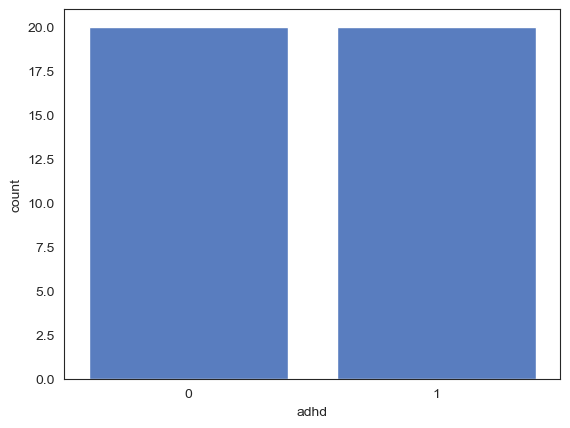

In [10]:
y = pheno['adhd']

print('Number of classes:',y.unique())

sns.set_style("white")
sns.set_palette("muted")
sns.countplot(x= y)

print(y.value_counts())

AGE DISTRIBUTION

In [11]:
age = pheno['age']

age.describe()

count    40.000000
mean     12.503586
std       3.373002
min       8.580000
25%       9.830000
50%      11.330000
75%      14.580000
max      20.820000
Name: age, dtype: float64

Asymmetry: 0.000000
Kurtosis: -2.108108


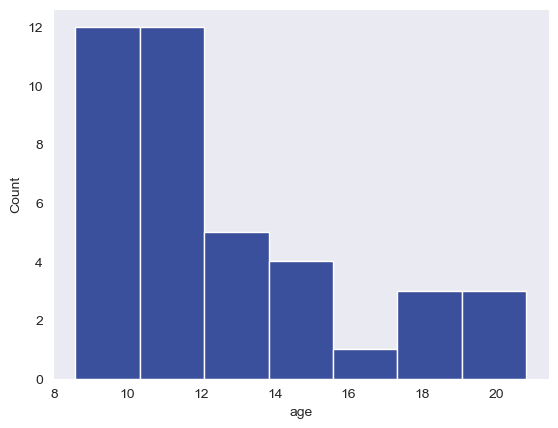

In [12]:
sns.set_style("dark")
sns.set_palette("dark")
sns.histplot(age)

#skewness and kurtosis
print("Asymmetry: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())

The provided values represent the skewness and kurtosis of the 'age' column in the ADHD dataset.

- **Skewness**: 
  - Skewness measures the asymmetry of the distribution of values in a dataset. 
  - A skewness of 0 indicates a symmetric distribution.
  - In this case, the skewness value of 0.000000 suggests that the distribution of ages is approximately symmetric.

- **Kurtosis**:
  - Kurtosis measures the "tailedness" or the degree of outliers in the distribution of values.
  - A negative kurtosis indicates a platykurtic distribution, meaning the distribution has thinner tails and fewer outliers compared to a normal distribution.
  - The kurtosis value of -2.108108 suggests a platykurtic distribution for the ages in this dataset, indicating fewer outliers compared to a normal distribution.


**Load the atlas**

* The DiFuMo atlas provides dictionaries of functional modes optimized for extracting functional signals from fMRI data, available in various dimensionalities (64, 128, 256, 512, and 1024).

* Has multiple resolutions, for larger networks or finer-grained ROIs. 

Let's use a 64-ROI atlas to allow some detail, but to ultimately keep our connectivity matrices manageable


In [13]:
dim = 64
difumo = datasets.fetch_atlas_difumo(
    dimension=dim, resolution_mm=2, legacy_format=False
)

atlas_filename = difumo.maps




This code segment loads the DiFuMo atlas, which provides dictionaries of functional modes optimized for extracting functional signals from fMRI data.
1. **Specifying Atlas Dimensionality**:
 
   - This line sets the desired dimensionality of the atlas to 64. This means the atlas will contain 64 regions of interest (ROIs).

2. **Fetching the Atlas**:

   - This line fetches the DiFuMo atlas using the `fetch_atlas_difumo` function from the `datasets` module in the `nilearn` library.
   - Parameters:
     - `dimension=dim`: Specifies the desired dimensionality of the atlas.
     - `resolution_mm=2`: Sets the resolution of the atlas in millimeters. Here, it's set to 2 mm.
     - `legacy_format=False`: This parameter is set to `False`, indicating that the fetched atlas will use the non-legacy format.

3. **Accessing Atlas Filename**:

   - This line extracts the filename of the atlas maps from the fetched `difumo` object.

After executing this code, the variable `atlas_filename` will contain the filename of the DiFuMo atlas maps corresponding to the specified dimensionality (64 ROIs) and resolution. 

In [14]:
difumo.labels

,component,difumo_names,yeo_networks7,yeo_networks17,gm,wm,csf
0,1,Superior frontal sulcus,DefaultB,DefaultA,0.689996,0.185709,0.116884
1,2,Fusiform gyrus,No network found,No network found,0.844733,0.021026,0.133789
2,3,Calcarine cortex posterior,VisCent,VisPeri,0.601768,0.302067,0.091297
3,4,Cingulate cortex posterior,DefaultB,DefaultA,0.740086,0.140368,0.119567
4,5,Parieto-occipital sulcus superior,ContA,ContC,0.640157,0.241492,0.117826
...,...,...,...,...,...,...,...
59,60,Cuneus,VisCent,VisPeri,0.627179,0.269783,0.103005
60,61,Middle temporal gyrus,DefaultB,DefaultB,0.726527,0.149595,0.107329
61,62,Superior frontal gyrus,DefaultB,DefaultB,0.651182,0.062243,0.224067
62,63,Central sulcus,SomMotA,SomMotB,0.578502,0.291674,0.109244


In [15]:

labels = difumo.labels["difumo_names"]

# Generate a random correlation matrix of size 64x64
correlation_matrix = np.random.rand(64, 64)

# Fill the diagonal with 1s
np.fill_diagonal(correlation_matrix, 1)

# Extract the upper triangle of the correlation matrix (excluding diagonal)
upper_triangle = np.triu(correlation_matrix, k=1)

# Flatten the upper triangle into features
features = upper_triangle[np.triu_indices(64, k=1)]

print('Features shape:', features.shape)
print('Labels shape:', labels.shape)

Features shape: (2016,)
Labels shape: (64,)


In [16]:


# Reshape the features into a correlation matrix
correlation_matrix_reconstructed = np.zeros((64, 64))
correlation_matrix_reconstructed[np.triu_indices(64, k=1)] = features

# Now, we'll create a mapping between each feature and its corresponding brain region pair along with a unique index
feature_mapping = {}
count = 1
for i in range(64):
    for j in range(i+1, 64):
        feature_name = f'{labels[i]} - {labels[j]}'
        feature_mapping[count] = {'name': feature_name, 'index': count}
        count += 1




In [29]:
feature_mapping[20]

{'name': 'Superior frontal sulcus - Cerebellum I-V', 'index': 20}

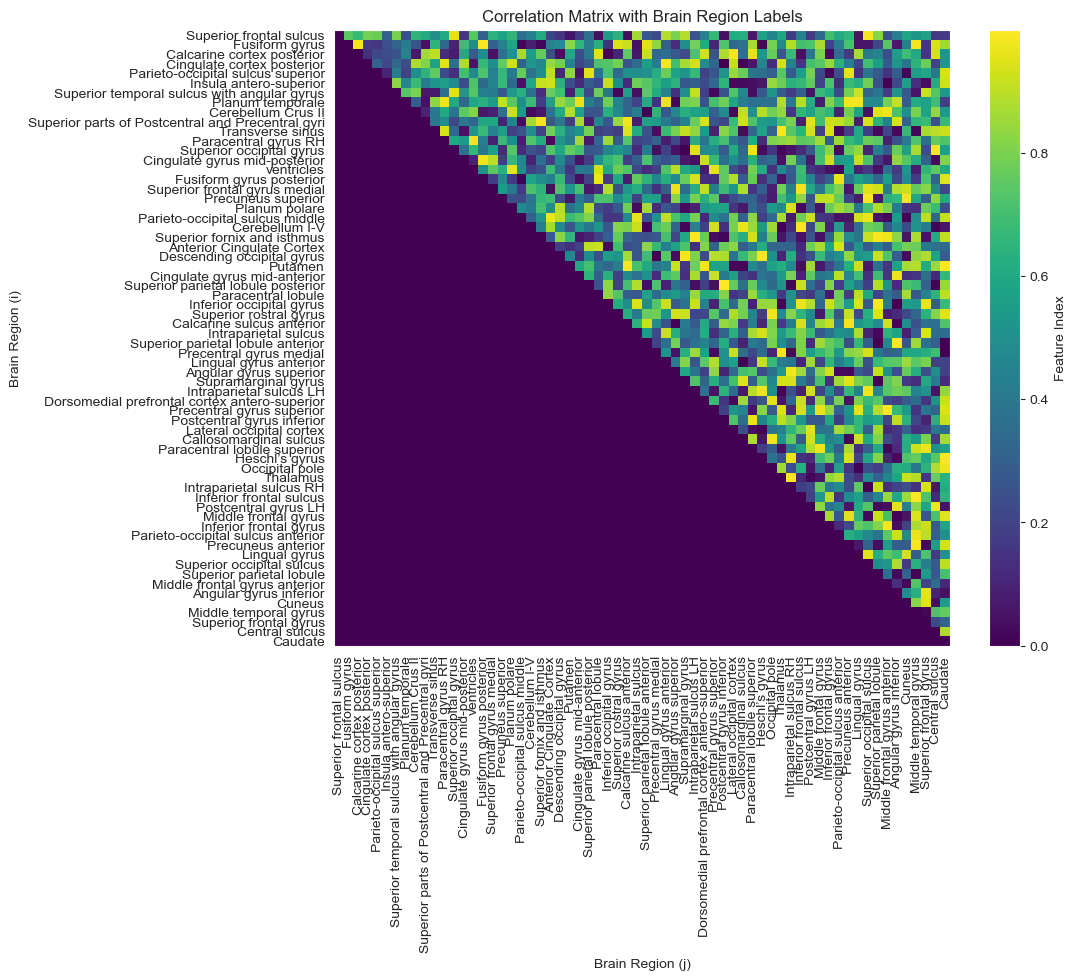

In [31]:
# Define the size of the figure
plt.figure(figsize=(10, 8))

# Plot the correlation matrix
plt.imshow(correlation_matrix_reconstructed, cmap='viridis', origin='upper')

# Add labels to the axes
plt.xticks(range(64), labels, rotation=90)
plt.yticks(range(64), labels)

# Add color bar
plt.colorbar(label='Feature Index')

# Add title and labels
plt.title('Correlation Matrix with Brain Region Labels')
plt.xlabel('Brain Region (j)')
plt.ylabel('Brain Region (i)')

# Display the plot
plt.show()


### Extract features with nilearn masker

Compute a correlation matrix, representing regional coactivation between regions and extract signals from a brain parcellation 


In [36]:
from nilearn.maskers import MultiNiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

# create masker using MultiNiftiMapsMasker to extract functional data within
# atlas parcels from multiple subjects using parallelization to speed up the
# # computation
masker = MultiNiftiMapsMasker(
    maps_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    n_jobs=2, verbose=0
)

# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(
    kind="correlation", vectorize=True, discard_diagonal=True)


# METHOD 2

# extract time series from all subjects
#time_series = masker.fit_transform(data_adhd, confounds=data_confounds)

# calculate correlation matrices across subjects and display
#correlation_matrices = connectome_measure.fit_transform(time_series)


**Extract fMRI connectivity features from every subject.**



In [37]:
# Load the features

feat_file = 'ADHD_Difumo_featuress.npz'
X_features = np.load(feat_file)['a']

print('Features shape:', X_features.shape)

Features shape: (40, 2016)


The 2016 features represent matrices of correlations.

1. **Number of Subjects**:
   - We have data for 40 subjects, as indicated by the first dimension of the shape `(40, 2016)`.

2. **Number of Features**:
   - Each subject has a set of features associated with it.
   - In this case, each subject's features consist of a correlation matrix.
   - The correlation matrix represents the strength of connections between different brain regions.
   - Since each correlation matrix has been vectorized (flattened into a one-dimensional array) using the `vectorize=True` parameter when computing connectivity measures, each matrix is represented by 2016 features.


So, each of the 2016 features corresponds to a specific connection between two brain regions in the correlation matrix. Each subject's set of features contains information about how strongly these connections are correlated.

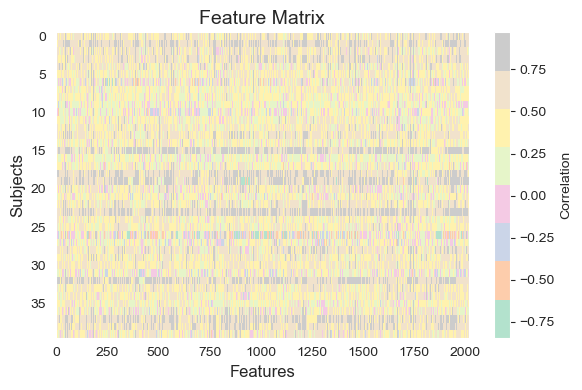

In [38]:
# Create the plot
plt.figure(figsize=(6, 4))
plt.imshow(X_features, aspect='auto', cmap='Pastel2', interpolation='nearest')

# Add colorbar
plt.colorbar(label='Correlation')

# Add title and labels
plt.title('Feature Matrix', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Subjects', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Prepare data for machine learning

In [39]:
y_adhd = pheno['adhd']

print('y type:',type(y_adhd))
print('X type:',type(X_features))

y type: <class 'pandas.core.series.Series'>
X type: <class 'numpy.ndarray'>


In [40]:
from sklearn.model_selection import train_test_split

# Split the sample into training/test, stratify by age class, and shuffle the data
X_train, X_test, y_train, y_test = train_test_split(
    X_features,  # X 
    y_adhd,  # y 
    test_size=0.4,  # 60%/40% split
    shuffle=True,  # shuffle dataset before splitting
    stratify=y_adhd,  # keep distribution of class consistent between train & test sets.
    random_state=123  # same shuffle each time
)

# Print the size of the training and test sets
print('training:', len(X_train), 'testing:', len(X_test))

training: 24 testing: 16


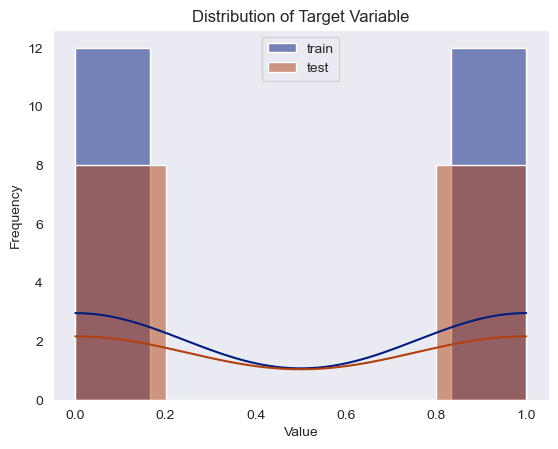

training: 24 testing: 16


In [41]:
# Check data distribution
sns.histplot(y_train, label='train', kde=True)
sns.histplot(y_test, label='test', kde=True)
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

# Print the size of the training and test sets
print('training:', len(X_train), 'testing:', len(X_test))


## Run our model!

We'll start with a standard classification model called a Support Vector Classifier (SVC)

Despite its simplicity, this model shines in its ability to deliver robust results. Given our data constraints, a straightforward approach often proves to be the most effective.

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the Support Vector Classifier
svc_model = SVC()


# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Expand range of penalty parameter C
    'kernel': ['rbf'],  # Kernel types: linear, radial basis function (rbf), polynomial (poly)
    'gamma': ['scale'],  # Expand range of gamma values
}

# Define cross-validation technique (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print results
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [43]:

# Train the model with the best parameters
best_svc_model = SVC(**best_params)
best_svc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svc_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6875
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.67      0.75      0.71         8

    accuracy                           0.69        16
   macro avg       0.69      0.69      0.69        16
weighted avg       0.69      0.69      0.69        16



Classification report:

- **Precision:** How precise the model's positive predictions are.
- **Recall:** How many actual positives the model can identify.
- **F1-score:** A balance between precision and recall.
- **Support:** The number of instances for each class.
- **Accuracy:** Overall correctness of the model's predictions.

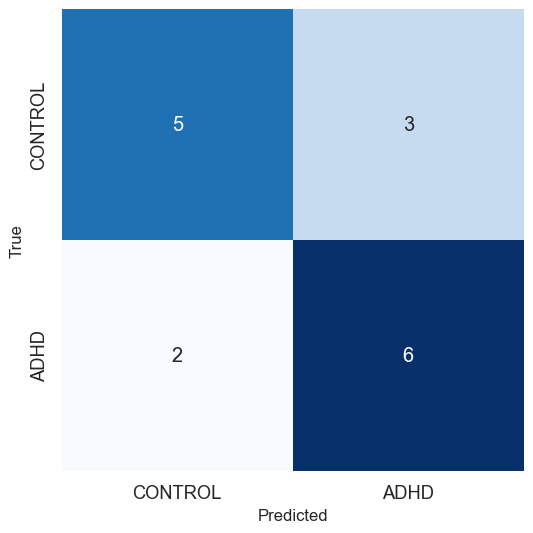

In [44]:
# Compute and plot the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot a prettier confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    square=True,
    xticklabels=['CONTROL', 'ADHD'],
    yticklabels=['CONTROL', 'ADHD'],
)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.title("", fontsize=15)
plt.show()

## Interpreting model feature importance

In [45]:
# Get feature importance for non-linear kernel
# First, obtain the indices of support vectors
support_vector_indices = best_svc_model.support_
# Then, retrieve the support vectors
support_vectors = X_train[support_vector_indices]
# Calculate dual coefficients (Lagrange multipliers)
dual_coefs = best_svc_model.dual_coef_
# Compute feature importance using support vectors and dual coefficients
feature_importance = np.dot(dual_coefs, support_vectors).flatten()


In [46]:
# Sort feature importance scores in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]

# Print the top 10 highest feature importance scores
print("Top 10 Feature Importance Scores:")
for i in range(10):
    print(f"Feature {sorted_indices[i]+1}: {sorted_importance[i]}")

Top 10 Feature Importance Scores:
Feature 1676: 6.642315690844125
Feature 238: 5.738047169717171
Feature 240: 5.30534212849425
Feature 618: 5.036077373237087
Feature 415: 5.003627786457529
Feature 235: 4.847928236528027
Feature 429: 4.824347323278767
Feature 102: 4.462733502779928
Feature 1711: 4.40809333250211
Feature 1229: 4.31811566651174


In [51]:


# Convert the feature_mapping dictionary to a DataFrame
feature_mapping_df = pd.DataFrame.from_dict(feature_mapping, orient='index')

# Reset the index to make the 'index' column a regular column
feature_mapping_df.reset_index(inplace=True)

# Set column names
feature_mapping_df.columns = ['Feature Index', 'Feature Name', 'Feature Details']

# Print the feature mapping DataFrame

feature_mapping_df



,Feature Index,Feature Name,Feature Details
0,1,Superior frontal sulcus - Fusiform gyrus,1
1,2,Superior frontal sulcus - Calcarine cortex pos...,2
2,3,Superior frontal sulcus - Cingulate cortex pos...,3
3,4,Superior frontal sulcus - Parieto-occipital su...,4
4,5,Superior frontal sulcus - Insula antero-superior,5
...,...,...,...
2011,2012,Middle temporal gyrus - Central sulcus,2012
2012,2013,Middle temporal gyrus - Caudate,2013
2013,2014,Superior frontal gyrus - Central sulcus,2014
2014,2015,Superior frontal gyrus - Caudate,2015


In [48]:


# Create lists to store the data
feature_indices = []
feature_names = []
feature_importances = []

# Populate the lists
for i in range(10):
    feature_index = sorted_indices[i]
    feature_name = feature_mapping_df.loc[feature_index, 'Feature Name']
    feature_indices.append(feature_index + 1)  # Adding 1 to match the original indexing
    feature_names.append(feature_name)
    feature_importances.append(sorted_importance[i])

# Create a DataFrame
top_10_features_df = pd.DataFrame({
    'Feature Index': feature_indices,
    'Feature Name': feature_names,
    'Importance Score': feature_importances
})


top_10_features_df


,Feature Index,Feature Name,Importance Score
0,1676,Intraparietal sulcus LH - Inferior frontal sulcus,6.642316
1,238,Cingulate cortex posterior - Superior occipita...,5.738047
2,240,Cingulate cortex posterior - Middle frontal gy...,5.305342
3,618,Transverse sinus - Paracentral lobule superior,5.036077
4,415,Superior temporal sulcus with angular gyrus - ...,5.003628
5,235,Cingulate cortex posterior - Parieto-occipital...,4.847928
6,429,Planum temporale - Superior frontal gyrus medial,4.824347
7,102,Fusiform gyrus - Postcentral gyrus inferior,4.462734
8,1711,Dorsomedial prefrontal cortex antero-superior ...,4.408093
9,1229,Descending occipital gyrus - Superior parietal...,4.318116


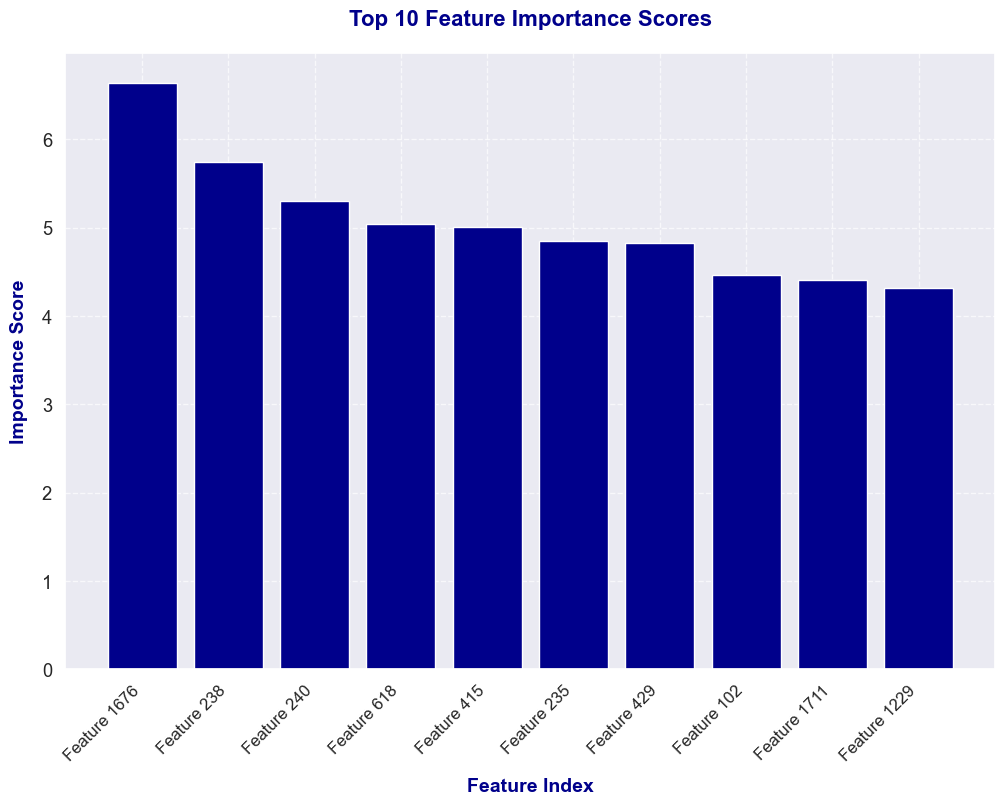

,Feature Index,Feature Name,Importance Score
0,1676,Intraparietal sulcus LH - Inferior frontal sulcus,6.642316
1,238,Cingulate cortex posterior - Superior occipita...,5.738047
2,240,Cingulate cortex posterior - Middle frontal gy...,5.305342
3,618,Transverse sinus - Paracentral lobule superior,5.036077
4,415,Superior temporal sulcus with angular gyrus - ...,5.003628
5,235,Cingulate cortex posterior - Parieto-occipital...,4.847928
6,429,Planum temporale - Superior frontal gyrus medial,4.824347
7,102,Fusiform gyrus - Postcentral gyrus inferior,4.462734
8,1711,Dorsomedial prefrontal cortex antero-superior ...,4.408093
9,1229,Descending occipital gyrus - Superior parietal...,4.318116


In [49]:

# Get the top 10 highest feature importance scores and their corresponding indices
top_indices = sorted_indices[:10]
top_importance = sorted_importance[:10]

# Plot the top 10 highest feature importance scores
plt.figure(figsize=(12, 8))
plt.bar(range(len(top_indices)), top_importance, color='darkblue')
plt.title('Top 10 Feature Importance Scores', fontsize=16, fontweight='bold', color='darkblue', loc='center', pad=20)
plt.xlabel('Feature Index', fontsize=14, fontweight='bold', color='darkblue', loc='center', labelpad=10)
plt.ylabel('Importance Score', fontsize=14, fontweight='bold', color='darkblue', loc='center', labelpad=10)
plt.xticks(range(len(top_indices)), [f'Feature {idx+1}' for idx in top_indices], rotation=45, ha='right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

top_10_features_df

Analysis of potential cognitive functions:

1. **Intraparietal Sulcus (LH) - Inferior Frontal Sulcus:**
   - The intraparietal sulcus (IPS) is known to be involved in various cognitive functions such as attention, visuospatial processing, and numerical cognition.
   - The inferior frontal sulcus (IFS) is associated with executive functions, including working memory, inhibition, and task switching.
   - Correlations between these regions may indicate interactions between attentional processes mediated by the IPS and executive control functions supported by the IFS.

2. **Cingulate Cortex Posterior - Superior Occipital Sulcus:**
   - The posterior cingulate cortex (PCC) is part of the default mode network (DMN) and is involved in self-referential processing, episodic memory retrieval, and spatial navigation.
   - The superior occipital sulcus (SOS) is implicated in visual attention and perceptual processing.
   - Correlations between these regions may reflect the integration of visuospatial information from the SOS with internally directed cognitive processes mediated by the PCC.

3. **Cingulate Cortex Posterior - Middle Frontal Gyrus:**
   - See explanation for the posterior cingulate cortex (PCC) above.
   - The middle frontal gyrus (MFG) is associated with executive functions, including cognitive control, decision-making, and attentional modulation.
   - Correlations between the PCC and MFG may suggest interactions between internally directed cognitive processes and executive control functions.

4. **Transverse Sinus - Paracentral Lobule Superior:**
   - The transverse sinus is a large vein located in the brain's posterior fossa.
   - The paracentral lobule is part of the primary motor cortex and is involved in motor planning and execution, as well as somatosensory processing.
   - Correlations between these regions may reflect interactions between motor control processes and vascular dynamics.

5. **Superior Temporal Sulcus with Angular Gyrus - Angular Gyrus Inferior:**
   - The superior temporal sulcus (STS) is implicated in social cognition, including processing of facial expressions, biological motion, and theory of mind.
   - The angular gyrus is involved in various cognitive functions, including language processing, semantic integration, and numerical cognition.
   - Correlations between these regions may indicate interactions between social cognitive processes mediated by the STS and semantic processing supported by the angular gyrus.

6. **Planum Temporale - Superior Frontal Gyrus Medial:**
   - The planum temporale is involved in auditory processing, including speech perception and phonological processing.
   - The medial part of the superior frontal gyrus is associated with executive functions and self-referential processing.
   - Correlations between these regions may suggest interactions between auditory processing and internally directed cognitive processes.

7. **Fusiform Gyrus - Postcentral Gyrus Inferior:**
   - The fusiform gyrus is involved in various visual processes, including face recognition, object recognition, and perceptual expertise.
   - The postcentral gyrus is the primary somatosensory cortex, responsible for processing tactile sensations from the body.
   - Correlations between these regions may reflect interactions between visual processing of complex stimuli in the fusiform gyrus and somatosensory processing in the postcentral gyrus.

8. **Dorsomedial Prefrontal Cortex Antero-Superior - Angular Gyrus Inferior:**
   - The dorsomedial prefrontal cortex (dmPFC) is implicated in self-referential processing, social cognition, and emotional regulation.
   - See explanation for the angular gyrus above.
   - Correlations between these regions may suggest interactions between self-referential processing mediated by the dmPFC and semantic processing supported by the angular gyrus.

9. **Descending Occipital Gyrus - Superior Parietal Lobule:**
   - The descending occipital gyrus is involved in visual processing, including object recognition and spatial perception.
   - The superior parietal lobule is associated with visuospatial processing, attentional orienting, and sensorimotor integration.
   - Correlations between these regions may indicate interactions between visual processing in the occipital gyrus and spatial attentional processes in the parietal lobule.

These interpretations provide insights into how functional connectivity between these brain regions may support various cognitive functions and neural processes. Keep in mind that these interpretations are based on known functions associated with these brain regions and their connectivity patterns. Further research and experimentation would be necessary to confirm these interpretations.